# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups=pd.read_csv('../input/50-startup/50_Startups.csv')
df=startups.copy()
df


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
df.isna().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

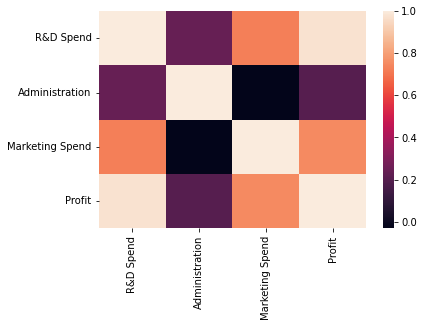

In [8]:
corr=df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [9]:
#Grafiğin daha anlaşılabilir olması için belirli parametreler verebiliriz.

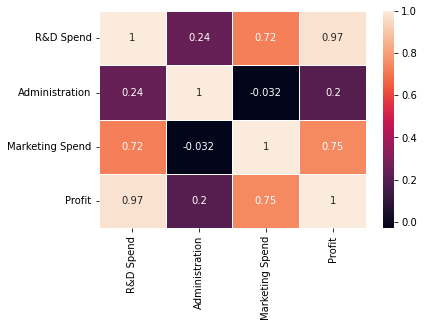

In [10]:
corr=df.corr()
sns.heatmap(corr, 
annot = True,linewidth = 0.5);
#annot = True parametresi sayıların gözükmesini sağlar.
 #linewidth = 0.5 ise kutucukların arasına verilen değer kadar boşluk açar.

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

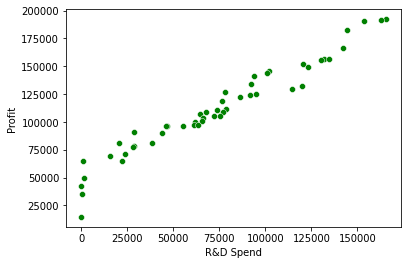

In [11]:

sns.scatterplot(x='R&D Spend',y='Profit',data=df,color='green');


Dogrusal ilişkiyi göstermek için ımplot çizdirelim

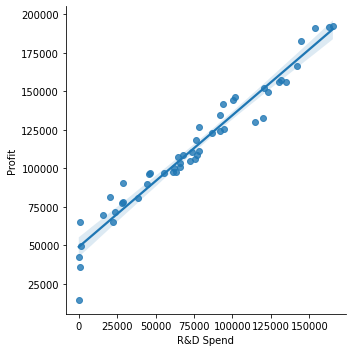

In [12]:
sns.lmplot(x="R&D Spend", y="Profit", data=df);

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

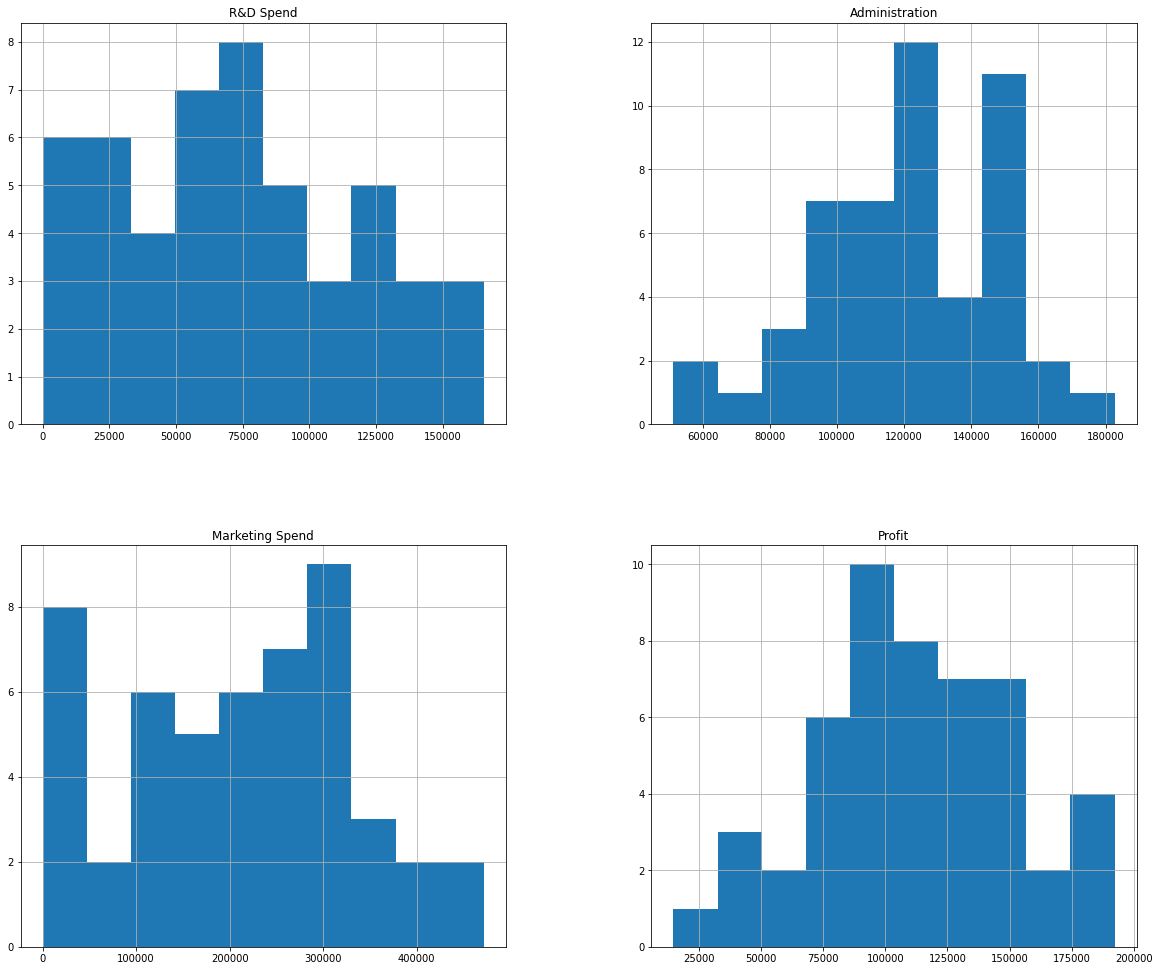

In [13]:
df.hist(figsize=(20,17))
plt.show()

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [15]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
df['State'].nunique()

3

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [17]:
pd.get_dummies(df['State'])

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [18]:
dummies=pd.get_dummies(df['State'],prefix='State')

In [19]:
df=pd.concat([df,dummies],axis=1)

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [21]:
df = startups
df=pd.get_dummies(df, columns=['State'], drop_first=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [22]:
X = df.drop("Profit", axis = 1)
y = df["Profit"]

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [23]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [24]:
y.head() #y degişkenini (bagımlı degişkeni) olan profiti görüntülemektedir

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

![](https://miro.medium.com/max/776/1*QSXxOderidihfo1itIE7cw.png)

4 parça değişkeni kontrol edelim.

In [26]:
X_train.shape

(40, 5)

In [27]:
y_train.shape

(40,)

In [28]:
X_test.shape

(10, 5)

In [29]:
y_test.shape

(10,)

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [31]:
model.fit(X_train, y_train)

LinearRegression()

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [32]:
y_pred = model.predict(X_test)
y_pred

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [33]:
test_df = pd.DataFrame({'Gerçek Kar':y_test, 'Tahmin Edilen Kar':y_pred})
test_df

,Gerçek Kar,Tahmin Edilen Kar
13,134307.35,126362.879083
39,81005.76,84608.453836
30,99937.59,99677.494251
45,64926.08,46357.460686
17,125370.37,128750.482885
48,35673.41,50912.417419
26,105733.54,109741.350327
25,107404.34,100643.242816
32,97427.84,97599.275746
19,122776.86,113097.425244


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Mean Squared Error (MSE) : ',MSE)
print('Root Mean Squared Error (RMSE) : ',RMSE)
print('Mean Absolute Error (MAE) : ',MAE)

Mean Squared Error (MSE) :  82010363.04430099
Root Mean Squared Error (RMSE) :  9055.957323458464
Mean Absolute Error (MAE) :  6961.477813252376


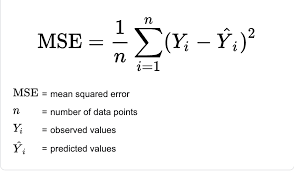

![](https://programmerah.com/wp-content/uploads/2020/11/20190714113817886.png)

![](https://mlwsoyfgxvif.i.optimole.com/u8DypnU-kPkH3SU3/w:214/h:147/q:mauto/https://i0.wp.com/www.relataly.com/wp-content/uploads/2020/05/image-28.png?resize=214%2C147&ssl=1)

Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [35]:
model.score(X_train, y_train)

0.9537019995248526

Dileyenler statsmodel kullanarak hangi özniteliklerin model için %95 güvenilirlikle ne kadar anlamlı olup olmadığına da bakabilir. Modelde bazı feature selection işlemleri yaparak tekrardan eğitip yeni sonuçlar mukayese edilebilir.


In [36]:
import statsmodels.api as sm
stmodel = sm.OLS(y, X).fit()
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              727.1
Date:                Mon, 09 May 2022   Prob (F-statistic):                    7.87e-42
Time:                        16:23:28   Log-Likelihood:                         -545.15
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1110.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7182      0.066     10.916      0.000       0.586       0.851
Administration      0.3113      0.035      8.885      0.000       0.241       0.382
Marketing Spend     0.0786      0.023      3.429      0.001       0.032       0.125
State_Florida    3464.4536   4905.406      0.706      0.484   -6415.541    1.33e+04
State_New York   5067.8937   4668.238      1.086      0.283   -4334.419    1.45e+04
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.241
Skew:                          -0.237   Prob(JB):                        0.538
Kurtosis:                       2.391   Cond. No.                     8.28e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> R-squared -> verilerin regresyon çizgisine ne kadar yakın olduğunun istatiksel ölçüsüdür.1'e yakın olduğunda iyi sonuç

> F-Statistic : Modelin anlamliligini test etmek icin kullanilan istatistik degeridir.

> Prob (F-statistic): Modelin anlamli olup olmadiginin bilgisini vermekte ve bu deger 0.05 den kucuk oldugundan dolayi  bizim modelimiz anlamlidir

>  OLS (Ordinary Least Squared): Sıradan en küçük kareler yöntemidir. Doğrusal regresyon modeli kurulurken verilerin ortasından geçen eğime (çizgiye) en az kare farkı ile yaklaşmaya çalışan bir yöntemdir.
>   > Adjusted (Düzenlenmiş) R-Squared: Bu değer genellikle çoklu regresyon analizinde kullanılır. Modele değişken eklendikçe R2 değeri değişkeni etkili varsayıp varyansını açıkladığını sanabilir. Ancak düzenlenmiş R2 mantığında her bir değişkenin bağımlı değişken üzerindeki etkisi ölçülerek daha optimum sonuçlar vermektedir. Anlamak için şöyle bir örnek verilebilir. Örneğin bir evin hem brüt hem de net metrekaresi bulunur. Brüt metrekare her şeyi içine dahil ederken net ise sadece yaşam alanına odaklanır. Dolayısı ile ev bakarken bu ikisi arasındaki farkı bilmek önemlidir. Model sonucunu incelerken de bu alana bakılması önemlidir.


Sınıflandırma problemlerinde öncelikle veri setimizi train ve test setleri olarak ayırır daha sonra train veri seti üzerinden model oluşturur ve test veri seti üzerinde yapılan tahminleri test ederiz. Ancak train/test ayrımında bazı problemler bulunabilir . Veri seti ayrımını rastgele yapamamış olabiliriz . Sadece belirli bir yaşta , belirli bir bölgeden , sadece kadın ya da erkekleri seçip onlar üzerinden model kurmuş olabiliriz. Bu da overfitting problemine sebep olacaktır. Bu problemi Cross Validation ile çözebiliriz.

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/12/4-Cross-Validation-Procedure.png?resize=768%2C252&ssl=1)

In [37]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(model, X_train, y_train, cv = 7, scoring = "r2")

array([0.92694132, 0.95140688, 0.96307748, 0.94425295, 0.96567718,
       0.84861066, 0.82744573])

In [39]:
cross_val_score(model, X_train, y_train, cv = 7, scoring = "r2").mean()

0.9182017422748938

In [40]:
#7 farklı parça üzerinde aynı işlemi yaptığımızda ise ortalama 91'ye düştü.